In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import mglearn
from mglearn.datasets import load_extended_boston
import warnings
warnings.filterwarnings('ignore')

### <center> Регуляризация в линейной регрессии


**Регуляризация** - метод добавления дополнительных ограничений в модель, чтобы предотвратить переобучение. Чаще всего эта информация имеет вид ***штрафа за сложность*** модели.

Однин из способов бороться с негативным эффектом излишнего подстраивания под данные — использование регуляризации, т. е. добавление некоторого штрафа за большие значения коэффициентов у линейной модели. Тем самым запрещаются слишком "резкие" изгибы, и предотвращается переобучение.

<img src='https://github.com/MalikaL17/course_materials/blob/main/img/overfit.PNG?raw=true'>

**Обычная линейная регрессия**

В стандартной линейной регрессии модель тренируется минимизировать сумму квадратов ошибки между истинными значениями **у** и предсказываемыми $\widehat{y}$, или остаточную сумму квадратов (residual sum of squares,**RSS**). То есть, мы стремимся подобрать коэффициенты модели таким образом, чтобы сумма квадратов ошибки была минимальна:
$$RSS = \sum_{i=1}^n(y_{i} - \widehat{y_{i}})^{2}$$
$$RSS \rightarrow min$$

### <center> Виды регуляризации:

1. **L2-регуляризация** - стремится сделать коэффициенты модели как можно меньше, близкими их к нулю. При этом, коэфициенты **не зануляются**.

Ее реализация в линейной регрессии **Гребневая регрессия (Ridge Regression)**. Помимо минимизации **RSS** также минимизирует общий размер коэффициентов, чтобы коэффициенты модели были как можно меньше. 

**Фактический смысл:** в результати применения L2-регуляризации каждый признак должен иметь как можно меньшее влияние на результат (то есть каждый признак должен иметь небольшой регрессионный коэффициент) и в то же время он должен по-прежнему обладать хорошей прогнозной силой.

Для этого мы минимизируем не только **RSS**, но и некий **штраф** за общий размер значений коэффициентов, называемый сжимающим штрафом, потому что он пытается "сжать" модель. 

В гребневой регрессии сжимающий штраф — это настроечный гиперпараметр, умноженный на ***квадрат суммы всех коэффициентов***:
$$RSS + \alpha\sum_{j=1}^p\beta_j^2 \rightarrow min $$
$\beta_j$  - коэффициент  j-го  из  p  признака

$\alpha$ - гиперпараметр 
    
- Увеличение $\alpha$ заставляет коэффициенты сжиматься до близких к нулю значений, что снижает качество работы модели на обучающем наборе, но может улучшить ее обобщающую способность.
- При очень малых значениях alpha, ограничение на коэффициенты практически не накладывается и мы в конечном итоге получаем модель, напоминающую линейную регрессию

2. **L1-регуляризация** - также стремится сделать коэффициенты модели как можно меньше, близкими их к нулю, однако, в отличии от L2-регуляризации, некоторые коэфициенты  могут **становится равными нулю**. Это означает, что некоторые признаки могут ***полностью*** исключится из модели.

Линйная регрессия с L1-регуляризацией называется **Лассо-регрессия (Lasso Regression)**. Лассо очень похожа на гребневую регрессию, за исключением того, что сжимающий штраф — это настроечный параметр, умножаемый на ***сумму абсолютных значений всех коэффициентов***:
    
$$\frac{1}{2n}RSS + \alpha\sum_{j=1}^p|\beta_j| \rightarrow min $$
где n - количество наблюдений

**Фактический смысл:** этот вид регуляризации можно рассматривать как один из видов автоматического отбора признаков. Получение нулевых значений для некоторых коэффициентов часто упрощает интерпретацию модели и может выявить наиболее важные признаки вашей модели.

**Так какую же из них следует использовать?**

- В качестве очень общего эмпирического правила нужно учитывать, что **гребневая perрессия** часто дает несколько лучшие предсказания, чем лассо, но **лассо** производит более интерпретируемые модели. 
- Если мы хотим сбалансировать штрафные функции между гребнем и лассо, мы можем использовать **ElasticNet**, представляющую собой регрессионную модель, в которую включены оба штрафа. Независимо от того, какой из них мы используем, гребневая регрессия и лассо-регрессия могут штрафовать большие или сложные модели, включая значения коэффициентов в функцию потери, которую мы пытаемся минимизировать.
- Гиперпараметр $\alpha$  позволяет нам контролировать то, насколько мы штрафуем коэффициенты, где более высокие значения а создают более простые модели. Идеальное значение а должно быть настроено, как и любой другой гиперпараметр. В библиотеке scikit-leam а устанавливается с помощью параметра alpha.

- Библиотека scikit-leam включает класс Ridgecv, реализующий метод, который позволяет отбирать идеальное значение для $\alpha$ 

### Что такое гиперпараметры модели?

**Гиперпараметры** - параметры алгоритмов, которые используются для ***управления процессом обучения**. Их значения устанавливаются **перед** началом обучения модели. 

**Важно!:** Это не то же самое, что обычные параметры модели (!). Обычные параметры модели вычисляются **в процессе обучения**. 

Если рассматривать Гребневую регрессию, то $\alpha$  - это **гиперпараметр**, который мы устанавливаем перед обучением. Пример обычных **параметров** в линейной регрессии - это коффициенты $\beta_j$ перед факторами, именно их мы и получаем в результате обучения 

### 1. Ridge Regression

Рассмотрим на примере прогнозирования цен на бостонских домах. Но для иллюстрации будем использовать не классический датасет, а расширенный. 

In [4]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.61


Видим, что значения коэффициентов довольно большие

In [101]:
lr.coef_[:10]

array([-412.7109467 ,  -52.24320682, -131.89881469,  -12.00413648,
        -15.51071293,   28.71633421,   54.70409916,  -49.53466595,
         26.58239271,   37.0620316 ])

Здесь мы видим, что на обучающем наборе модель Ridge дает меньшее значение R2, чем модель LinearRegression, тогда как значение R2 на тестовом наборе в случае применения гребневой регрессии выше. Это согласуется с нашими ожиданиями. При использовании линейной регрессии мы получили переобучение. Ridge – модель с более строгим ограничением, поэтому меньше вероятность переобучения. Менее сложная модель дает меньшее значение R2 на обучающем наборе, но лучшую обобщающую способность.

In [197]:
ridge = Ridge().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.89
R-квадрат на тестовом наборе: 0.75


In [102]:
ridge.coef_[:10]

array([-1.41368408, -1.55661895, -1.46543409, -0.12661607, -0.07911936,
        8.33161023,  0.25497506, -4.94145701,  3.89862268, -1.05866058])

Попробуем изменить параметр **alpha**

In [172]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.93
R-квадрат на тестовом наборе: 0.77


**RidgeCV** позволяет автоматически подобрать лучшие значения гиперпараметра **alpha**

In [200]:
lasr_cv = RidgeCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0])
lasr_cv.fit(X_train, y_train)
print(f"alpha = {lasr_cv.alpha_}, score = {lasr_cv.score(X_train, y_train)}")
print("R-квадрат на тестовом наборе: {:.2f}".format(lasr_cv.score(X_test, y_test)))

alpha = 0.1, score = 0.928227368500198
R-квадрат на тестовом наборе: 0.77


### Кривая обучения (Learning curve)

**Кривая обучения** - график, показывающий как меняетя качество модели с увеличение объема выборки. Обычно на графике откладывают две кривые - изменение метрик на трейте и тесте при увеличении обучающей выборки

<img src='https://github.com/MalikaL17/course_materials/blob/main/img/learning_curve_1.png?raw=true'>

<img src='https://github.com/MalikaL17/course_materials/blob/main/img/learning_curve_2.png?raw=true' width=40%>


Построим кривую обучения для линейной и ргербневой регрессии

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [5]:
ridge = Ridge().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

ValueError: Expected 2D array, got 1D array instead:
array=[17.0920011  16.68012794 32.28431441 15.30414674  7.90129708 12.95816217
 19.38995855  8.35972032 34.400316   21.92921103 13.21410249 27.94943319
  7.02511688  9.58862708 24.03409748 37.70445704 26.99371436 26.08239664
 15.70274556 33.79320043 32.6481271  10.7276867   8.30254965 26.11467875
 26.53400449 14.61850576 27.16907307 17.81340944 26.37050967 20.08746187
 15.46842762 17.23317403 13.61999804  6.80817166 18.06538675 34.54512064
 33.18228991 32.00207426 22.14832855 21.87994199 25.63098606 24.00574692
 15.13321192 28.49108199 13.11862761 18.96947532 30.71921503 19.45382016
 10.69592072 18.69814084 17.37456769 25.13476908 20.915002   16.4417526
  9.43376044 19.84000767 22.30271323 18.28777217 26.75255846 24.38864561
 26.50931214 45.90335797 15.16995481  8.14222426 32.74275145 31.11285242
 17.30761325 46.70997366 22.29445074 25.33114145 18.38370071 24.02634059
 44.17942352 24.52096667 14.74425503 38.20874842 34.75923581 16.78271948
 27.29973149 24.88538757 25.34479055 23.077247   20.19817314 28.02534186
 27.92875215 10.73752464 20.28830364 18.41958227  9.96352465 15.19126393
 25.61160112 17.50544586 32.6155447  14.91353536 21.10468787 17.17543534
 15.08936209 19.64134819 20.23344493 14.59710314 20.53884698 25.78323534
 19.20946931 13.71974347 21.8946429  24.90357414 31.2373815  20.52875374
 24.1620971  12.40245096 21.36405252 34.34811728 15.52045952 23.2636702
 24.26668889 22.54435602 15.45499758 31.85412141 25.74892597 29.92342698
 14.70711327 33.58632991 13.09071409 15.15199043 12.64800919 14.4262241
 43.10918089 17.00679146 14.17582644 29.34923702 21.50189442 16.64916157
 33.59640101 25.23260858 24.32599838 22.00322086 22.55702876 23.13640497
  8.83865523 18.91932676 31.37734885 17.89726919 13.57799112 27.05983232
 15.44897544 15.75479876 30.53076139 12.82428682 21.13341215 11.39443978
 13.78243898 20.79589636 20.26819032 18.57868476 22.02576067 20.78340815
 23.17249795 10.93641805 34.23640271 25.44522835 51.26823097 27.03415576
 31.85823718 19.43398224 15.29396328 23.56728735 26.17452196 15.9093987
 21.76708806 46.96475591 20.08973484 11.17996398 35.41093933 34.74489891
 17.52667077 19.84692243 16.49211984 22.65427462 19.89204074 21.94071748
  9.60887015 18.86452662 43.12311559 45.84449938 23.57944267 23.28425943
 20.61020407 24.94018497 17.65361388 13.21299257 21.30464368 24.16278487
 17.89901176 14.7984933  16.19060429 32.53460035 34.39713786 21.428435
 17.41531898 21.72310791  2.05895286 22.53222542 18.1078672  16.10565029
 18.31154    19.66807953 27.48343394 23.16737395 39.2054579  14.81418113
 32.77516505 30.73299062 23.38537376 44.66253669 19.5161818  20.98125476
 24.34871987 11.90862112 20.28343731 33.44888761 20.12876605 15.14383175
 36.91433775 16.4859421  29.81863729 31.46122304 34.95740295 19.13460082
 18.10296996 23.52966345 29.82707518 22.33010422 19.54811777 18.3630764
 31.63185062 20.8508137  19.96213155 19.16258875 12.44514812 11.55345592
 16.20387601 16.13823051 29.58935826 21.46344562 11.61576154 20.09730908
 31.87438962 13.79838309 24.12136824 14.51858449 24.71782846 21.73724494
 40.88855221 20.61059396 41.86424165 26.99357645 33.8898302  22.00033852
 30.48935391 46.18038624 40.23038878 21.15509101 23.06811954 28.66175725
 17.11946243 25.28144482 18.77335952 28.30515052 17.67303979 30.89573161
 10.85633471 14.00871905 17.26512731 35.29691009 31.36184471 15.42871413
 15.55211977 23.74572361 39.52603302 18.78571842 21.02162132 13.33794218
 21.62061127 48.03101186 25.64703328 48.2096817  25.58997939 22.16713402
 15.81419084  8.76305408 16.65072453 16.76641958 10.07007949 25.61999303
 25.61630089 51.33178756 19.65732258 25.75369848 35.73096225 30.70708187
  9.61581418 24.63838951 53.55344993 11.22132423 16.18745261 22.95479438
 18.56829124  9.61190623 19.21482377 34.59810647 13.99921105 23.68492997
 13.61453371 20.31114138 15.40198884 12.35589218 18.27986875 31.17941226
 17.24961435 32.6879185  49.53593393 48.98437852 18.03648126 16.9940208
 42.69750987 14.7526398  16.72776419 15.04257425 27.14756816 16.86328141
 13.28369433 23.10251348 11.67059581  5.53205583 19.24161094 13.70364804
 23.98880488  7.01715209 27.16729515 32.29374433 21.87229978 13.92196092
 15.11455247 21.17306181 30.53897983 24.70885023 21.01256141 16.8911353
  7.50335208 22.04711016 20.84944379 23.77686972 14.92026377 23.62547236
 19.68013977  8.03755429 24.90253132 21.18013298 28.65153658 33.01153442
 22.02895451 14.53401958 27.20901029 21.4995339  24.89138205 25.41128598
 27.66300473 22.23770939 31.64833471 18.50805987 19.16659494 19.4616463
 50.08437485 24.45066545 18.44617723 34.59522039 19.49691071 18.27070643
 20.70427474].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
lin_r2_train = []
lin_r2_test = []

ridge_r2_train = []
ridge_r2_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for n in range(1, len(X_train), 10):
#     Метрики по линейной регрессия
    lr = LinearRegression().fit(X_train[:n], y_train[:n])
    lr_train_pred = lr.predict(X_train[:n])
    lr_test_pred = lr.predict(X_test)

    lin_r2_train.append(lr.score(X_train[:n], y_train[:n]))
    lin_r2_test.append(lr.score(X_test, y_test))
    
#     Метрики по гребневой регресси
    ridge = Ridge().fit(X_train[:n], y_train[:n])
    ridge_train_pred = ridge.predict(X_train[:n])
    ridge_test_pred = ridge.predict(X_test)
    
    ridge_r2_train.append(ridge.score(X_train[:n], y_train[:n]))
    ridge_r2_test.append(ridge.score(X_test, y_test))

Урок здесь состоит в том, что при достаточном объеме обучающих данных регуляризация становится менее важной и при удовлетворительном объеме данных гребневая и линейная регрессии будут демонстрировать одинаковое качество работы

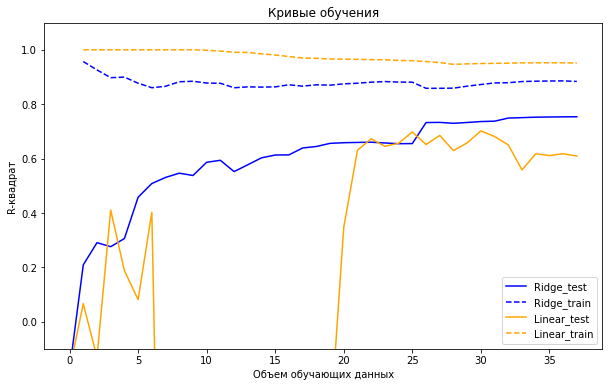

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x=[i for i in range(len(ridge_r2_test))], y=ridge_r2_test, label='Ridge_test', color='b');
sns.lineplot(x=[i for i in range(len(ridge_r2_train))], y=ridge_r2_train, label='Ridge_train', linestyle='dashed', color='b');

sns.lineplot(x=[i for i in range(len(lin_r2_test))], y=lin_r2_test, label='Linear_test', color='orange');
sns.lineplot(x=[i for i in range(len(lin_r2_train))], y=lin_r2_train, label='Linear_train', linestyle='dashed', color='orange');
plt.ylim((-0.1, 1.1))
plt.xlabel('Объем обучающих данных')
plt.ylabel('R-квадрат')
plt.title('Кривые обучения');

### 2. Lasso Regression

Как видно из сводки, Lasso дает низкое значение R2 как на обучающем, так и на тестовом наборе. Это указывает на недообучение и мы видим, что из 105 признаков используются только 4.

In [198]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

R-квадрат на обучающем наборе: 0.29
R-квадрат на тестовом наборе: 0.21
Количество использованных признаков: 4


In [137]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [202]:
# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train, y_train) # 
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.90
R-квадрат на тестовом наборе: 0.77
Количество использованных признаков: 32


In [141]:
lasso001.coef_

array([ -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -1.43260465,
        10.94771183,   0.        ,   0.        ,   0.        ,
        -0.39260971,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.75628457,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.10027365,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -3.96958293,
         0.        ,   6.61845793,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -4.42086828,  -2.10371434,
         3.79607992,  -0.        ,   4.38591262,   0.        ,
         0.        ,   0.1795777 ,  -0.        ,  -1.1614282 ,
        -4.33485764,  -0.        ,  -0.        ,  -2.13

In [184]:
lasr_cv = LassoCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0])
lasr_cv.fit(X_train, y_train)
print(f"alpha = {lasr_cv.alpha_}, score = {lasr_cv.score(X_train, y_train)}")
print("R-квадрат на тестовом наборе: {:.2f}".format(lasr_cv.score(X_test, y_test)))

alpha = 0.1, score = 0.7709955157630054
R-квадрат на тестовом наборе: 0.63


In [147]:
print(*lasr_cv.coef_.round(5))

-0.0 0.0 -0.0 0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -6.94791 0.0 -15.73533 -0.0 0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 -0.0 -0.0 0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.5725 0.0 -0.06795 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 19.43341 -0.0 -0.0 -0.0 -5.13377 -0.0 5.34522 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.45783 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0 0.0


### ElasticNet

In [161]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.3).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(elastic_net.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.71
R-квадрат на тестовом наборе: 0.54


In [168]:
el_cv_clf = ElasticNetCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 20.0],
                         l1_ratio=[0, 0.1, 0.25, 0.4, 0.5, 0.7, 0.8, 0.9, 1])
el_cv_clf.fit(X_train, y_train)

print(f"alpha = {el_cv_clf.alpha_}, l1_ratio = {el_cv_clf.l1_ratio_}, score = {el_cv_clf.score(X_train, y_train)}")
print("R-квадрат на тестовом наборе: {:.2f}".format(el_cv_clf.score(X_test, y_test)))

alpha = 0.1, l1_ratio = 1.0, score = 0.7709955157630054
R-квадрат на тестовом наборе: 0.63


In [61]:
for alpha in [0.0, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0, 1000]:
    print('alpha: ', alpha)
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    
    pred_train = ridge_reg.predict(X_train)

    pred_test = ridge_reg.predict(X_test)
    print('R2: ', r2_score(y_test, pred_test)) 
    print('MAE: ', mean_absolute_error(y_test, pred_test))
    print('_'*50)

alpha:  0.0
R2:  0.7112260057484923
MAE:  3.162709871457409
__________________________________________________
alpha:  0.1
R2:  0.7103178206391327
MAE:  3.162396775689548
__________________________________________________
alpha:  0.5
R2:  0.7070756189146228
MAE:  3.168235652913517
__________________________________________________
alpha:  1.0
R2:  0.7041586727559435
MAE:  3.1785390760345544
__________________________________________________
alpha:  5.0
R2:  0.6970172810260663
MAE:  3.2272757597567003
__________________________________________________
alpha:  10.0
R2:  0.6954181695183627
MAE:  3.249169899307783
__________________________________________________
alpha:  100.0
R2:  0.6850436955094978
MAE:  3.4209579918647974
__________________________________________________
alpha:  1000
R2:  0.6363004655780667
MAE:  3.802084315738072
__________________________________________________


In [40]:
for alpha in [0.0, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0, 1000]:
    print('alpha: ', alpha)
    ridge_reg = Lasso(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    
    pred_train = ridge_reg.predict(X_train)

    pred_test = ridge_reg.predict(X_test)
    print('MAE: ', mean_absolute_error(y_test, pred_test))
    print('_'*50)

alpha:  0.0
MAE:  3.162709871457413
__________________________________________________
alpha:  0.1
MAE:  3.267373797848226
__________________________________________________
alpha:  0.5
MAE:  3.395941585868075
__________________________________________________
alpha:  1.0
MAE:  3.6587976291978785
__________________________________________________
alpha:  5.0
MAE:  4.486736208450633
__________________________________________________
alpha:  10.0
MAE:  4.525931484269644
__________________________________________________
alpha:  100.0
MAE:  5.63383400378495
__________________________________________________
alpha:  1000
MAE:  6.533251561106156
__________________________________________________


<ipython-input-40-a30faa0e64a3>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ridge_reg.fit(X_train, y_train)
C:\Users\Malika\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Malika\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3990.550223273599, tolerance: 3.111537141242938
  model = cd_fast.enet_coordinate_descent(


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя fit()
reg_model.fit(X_train, y_train)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_train = reg_model.predict(X_train)

# __Смотрим метрики качества__
print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(X_test)
print('_'*50)
print('Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.9469794920108194
Mean absolute error (MAE) 1.6945117794034887
__________________________________________________
Метрики на тесте:
R2:  0.6610321968877197
Mean absolute error (MAE) 3.0649504691611713


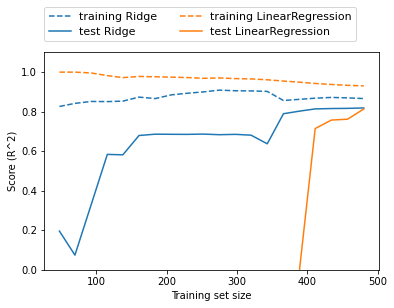

In [105]:
mglearn.plots.plot_ridge_n_samples():


C:\Users\Malika\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


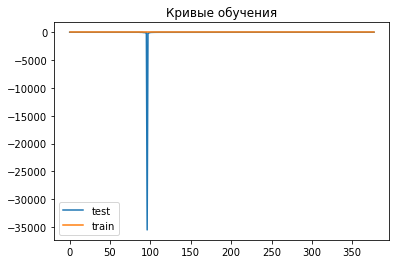

In [123]:
lin_r2_train = []
lin_r2_test = []

for n in range(1, len(X_train)):
    lr = LinearRegression()
    lr.fit(X_train[:n], y_train[:n])
    
    pred_train = lr.predict(X_train[:n])
    pred_test = lr.predict(X_test)
    
    lin_r2_train.append(lr.score(X_train[:n], y_train[:n]))
    lin_r2_test.append(lr.score(X_test, y_test))
    

sns.lineplot(x=[i for i in range(len(r2_test))], y=r2_test, label='test');
sns.lineplot(x=[i for i in range(len(r2_train))], y=r2_train, label='train');
plt.title('Кривые обучения');

In [132]:
X_test.shape

(127, 104)